Instanciate image reader:

In [1]:
from signreader.detector import ImageReader

ireader = ImageReader(print=True)



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.4 
platform:       	darwin 
python version: 	3.10.16 
torch version:  	2.7.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




Open image:

In [2]:
from PIL import Image

fname_img = '/Users/manu/boulot/unit_solutions/data/datasets/segmentation/cellpose/test/48159-1_2.jpg'
img_pil = Image.open(fname_img)

Run analysis:

In [4]:
icontent = ireader(img_pil)

[IR] Running sign detector...
[IR] Running symbol detector...

0: 1920x2560 1 bahnhof, 1 bushof, 3 strassenbahns, 1802.8ms
Speed: 84.6ms preprocess, 1802.8ms inference, 4.3ms postprocess per image at shape (1, 3, 1920, 2560)
[IR] Analyzing sign 1...
[IR] Running text reader...
[IR] Putting all sign information together...
[IR] Analyzing sign 2...
[IR] Running text reader...
[IR] Putting all sign information together...
[IR] Analyzing sign 3...
[IR] Running text reader...
[IR] Putting all sign information together...


Prototype result plot:

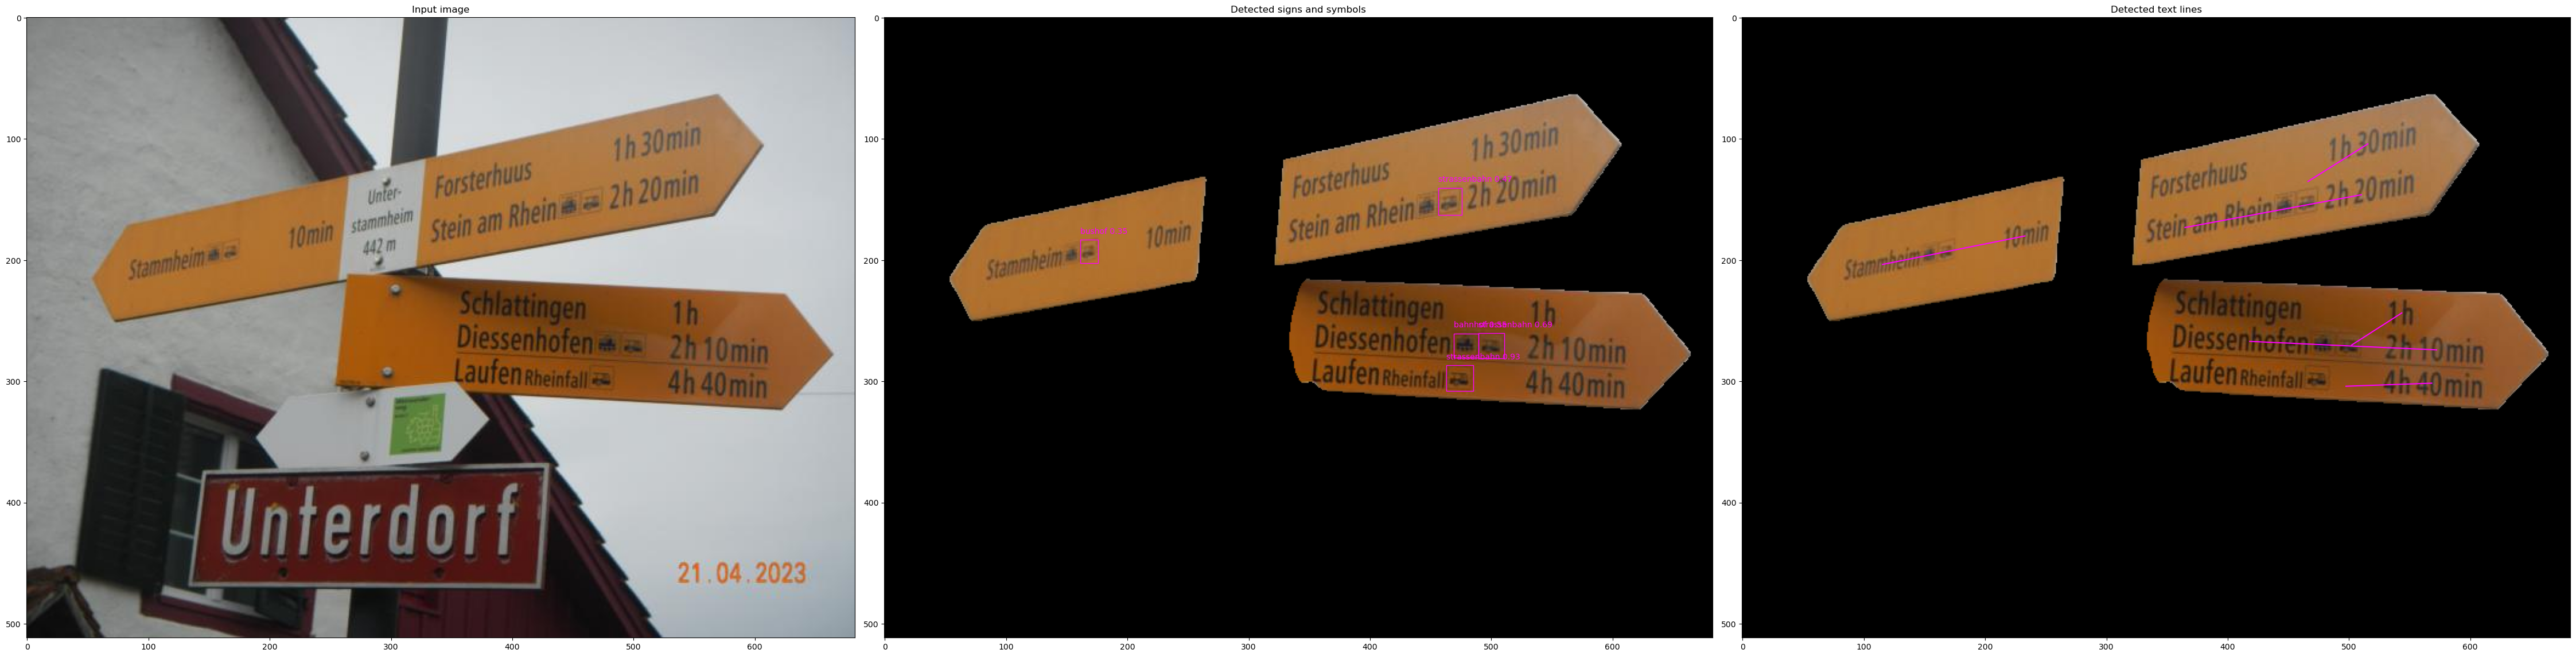

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_bounding_boxes(ax, img_np, boxes, class_names):
    ax.imshow(img_np)
    ax.set_title('Detected signs and symbols')
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        confidence = float(box.conf[0])
        class_id = int(box.cls[0])
        label = class_names[class_id]

        # Ajouter une boîte rectangle
        width, height = x2 - x1, y2 - y1
        rect = patches.Rectangle(
            (x1, y1),
            width,
            height,
            linewidth=1,
            edgecolor='magenta',
            facecolor='none',
        )
        ax.add_patch(rect)

        # Ajouter le texte (label + score)
        text = f"{label} {confidence:.2f}"
        ax.text(
            x1,
            y1 - 5,
            text,
            color='magenta',
            fontsize='medium',
        )


def plot_text_lines(ax, img_np, icontent):
    ax.imshow(img_np)
    ax.set_title('Detected text lines')
    for scontent in icontent: # for each sign in image
        for lcontent in scontent: # for each line in sign

            ax.plot(
                (lcontent['pos_dest'][0], lcontent['pos_dura'][0]),
                (lcontent['pos_dest'][1], lcontent['pos_dura'][1]),
                color='magenta',
            )


def plot_detector_result(img_np, masks, boxes, class_names, icontent):
    mask_binary = masks >= 1

    # Multiply image by mask, so we see only signs. Everything else is blacked out
    img_np_focus = np.zeros(img_np.shape, dtype=np.uint8)
    for channel in range(3):
        img_np_focus[:, :, channel] = img_np[:, :, channel] * mask_binary

    fig, axes = plt.subplots(1,3)
    axes[0].imshow(img_np)
    axes[0].set_title('Input image')

    plot_bounding_boxes(axes[1], img_np_focus, boxes, class_names)
    plot_text_lines(axes[2], img_np_focus, icontent)

    fig.set_figheight(15)
    fig.set_figwidth(45)
    fig.tight_layout()

    return fig, axes

img_np, masks, boxes, class_names, icontent = ireader.get_data()
fig, axes = plot_detector_result(img_np, masks, boxes, class_names, icontent)

In [28]:
print(icontent[0])


[{'destination': ' Forsterhuus', 'duration': ' 1h 30min', 'pos_dest': (466.2275390625, 135.0), 'pos_dura': (515.5849609375, 104.0), 'symbols': None}, {'destination': 'Stein am Rhein', 'duration': ' 2h 20min', 'pos_dest': (364.8447265625, 173.0), 'pos_dura': (510.2490234375, 146.0), 'symbols': [11]}]


Nice, plot prototyping complete. The functions are now in signreader.utils.plot, let's test if they work well:

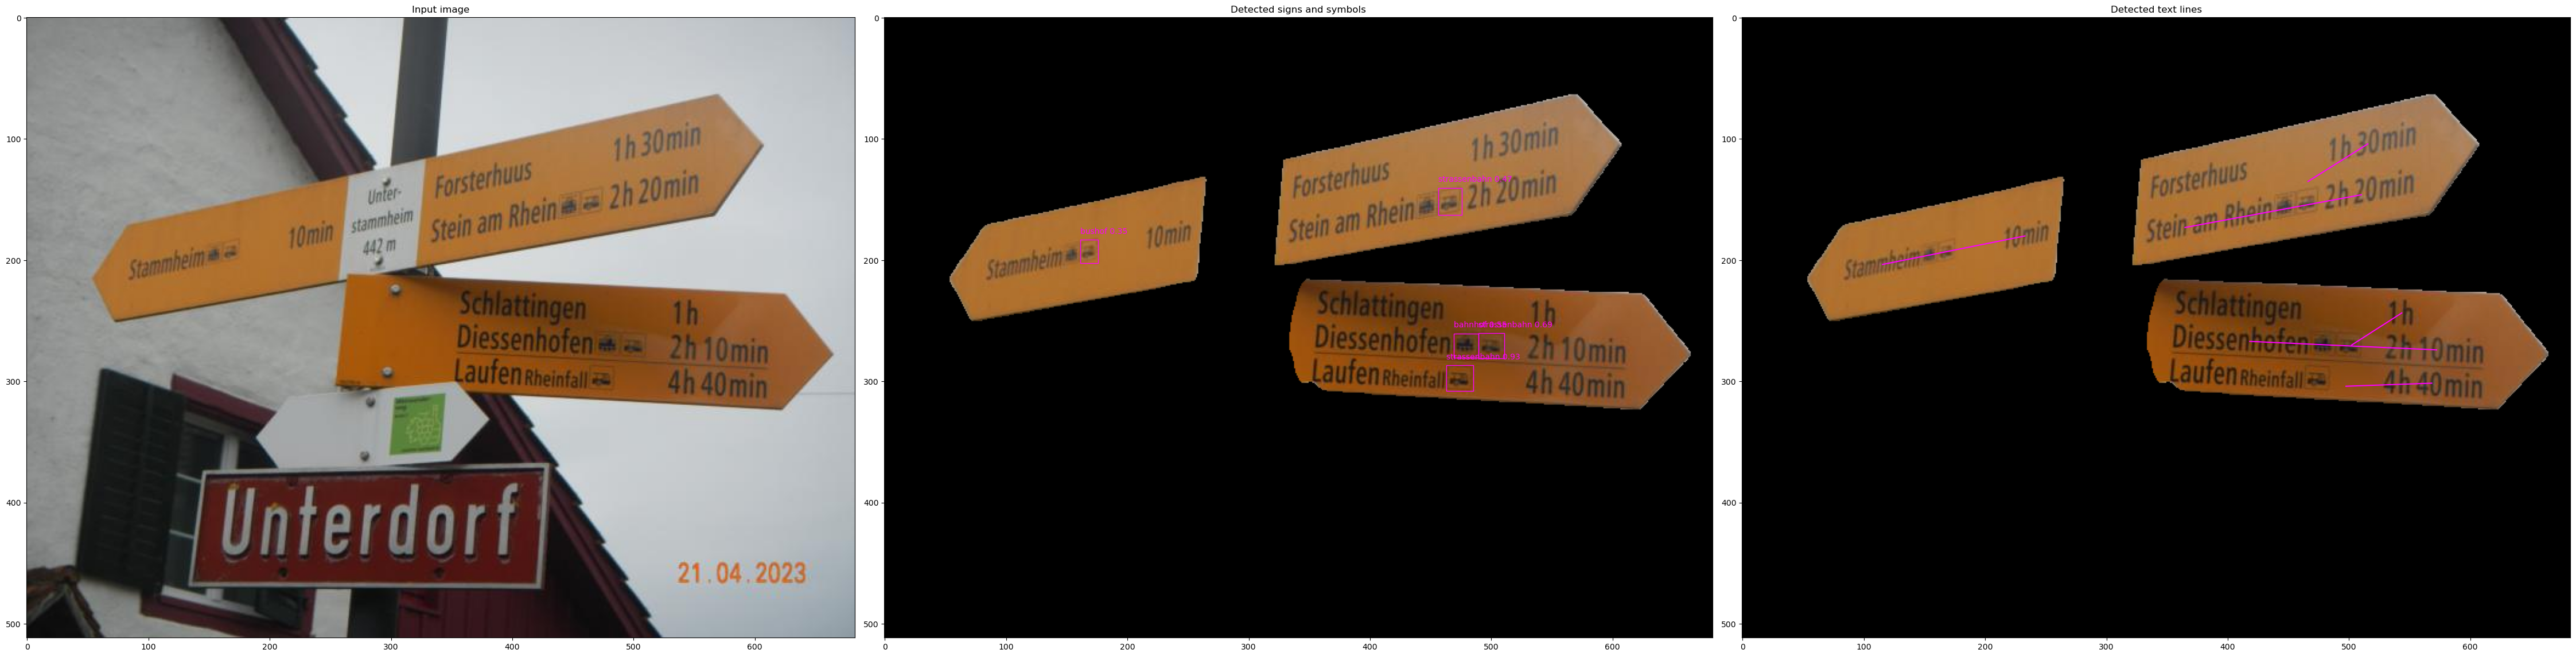

In [5]:
import signreader.utils.plot as plot
img_np, masks, boxes, class_names, icontent = ireader.get_data()
fig, axes = plot.plot_detector_result(img_np, masks, boxes, class_names, icontent)

In [40]:
import pprint

def save_image_content_as_txt(icontent, fname):
    with open(fname, 'w', encoding='utf-8') as f:
        for scontent in icontent:
            pprint.pprint(scontent, stream=f, sort_dicts=True)
            print('\n', file=f)

fname = '/Users/manu/boulot/unit_solutions/temp/image_content.txt'
save_image_content_as_txt(icontent, fname)